# Importing and cleaning the data :
First we start by importing the relevant libraries to be used
at first i only imported pandas,randomforestclassifier and linear regression from sklearn but as i worked on i needed more functions like R2_score from sklearn and sns/matplot to visualize the data

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from prettytable import PrettyTable


Now we import the data base that we will work on and inspect it to see if it needs cleaning.
it seems that we are missing the columns so we will start by getting them from the kaggle database desciption
our new columns are as follows :
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.


CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)


NOX - nitric oxides concentration (parts per 10 million)


RM - average number of rooms per dwelling


AGE - proportion of owner-occupied units built prior to 1940


DIS - weighted distances to five Boston employment centres


RAD - index of accessibility to radial highways


TAX - full-value property-tax rate per $10,000


PTRATIO - pupil-teacher ratio by town


B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


LSTAT - percentage of lower status of the population


MEDV - Median value of owner-occupied homes in $1000's

In [11]:
df = pd.read_csv('D:\Portfolio\Projects\Miscelaneous data\housing.csv', delimiter =';')
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(df.head(5))

      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  


We have loaded the data and set our columns , now we will check if our data is missing any values that might make our random forest not work.
running the function below shows that our data isn't missing any values.So let's do some visualization and then we can continue to the linear regression and random forest models.

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Visualizing the data :

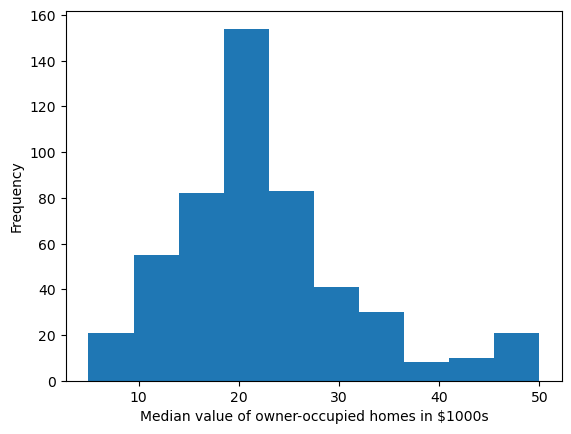

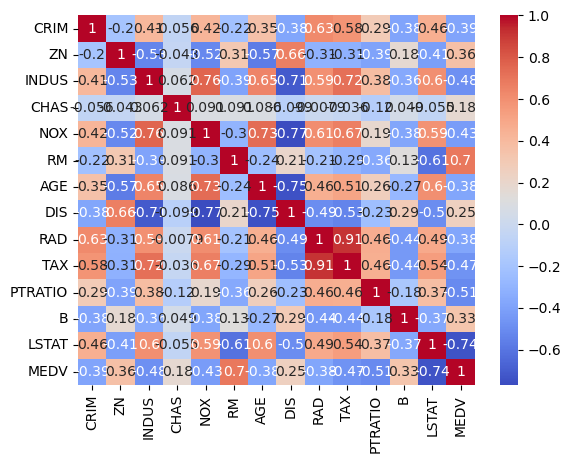

In [13]:
# histogram of the target variable
plt.hist(df['MEDV'])
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('Frequency')
plt.show()
#correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

we can obeserve from the histograms of the target column that our data follows a slightly normal distribution with its median being at 200000 dollars
at a frequency of 150 (ouf ot our sample dataset).
from the correlation matrix we can observe strong corerlation between some of our features such as taxation and accessibility to radial highways
and very weak correlation between some other features such as age and distance to employment centres. both observations seem logical.
Our dataset seems logical and has no missing values, the data types seem to be consistent so we can move on to the linear regression
# Linear Regression : 
First we will split our data into training and testing sets then we will train our model to predict the MEDV (median value of house prices) and finally we will evaluate its performance and try to visualize it.

Linear Regression:
Mean Squared Error: 20.56
R-squared: 0.75


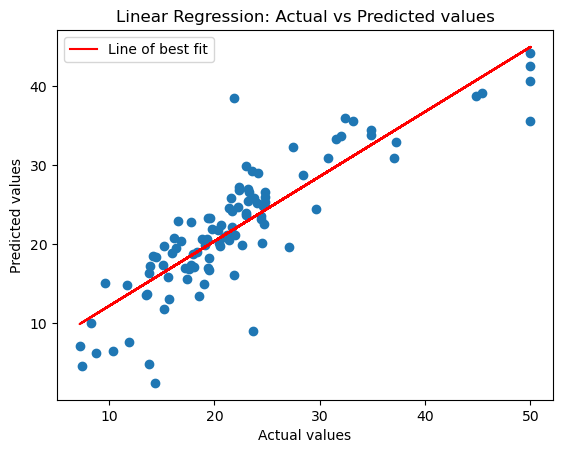

In [14]:
#Making a copy of the dataset specific to the Linear Regression : 
df_LR = df.copy()
#Splitting the data into training set and testing set
X = df_LR.drop('MEDV', axis=1)
y = df_LR['MEDV']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=25)
#Training the model 
lr = LinearRegression()
lr.fit(X_train, y_train)
#Evaluating 
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
#Visualizing the performance of the model 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression: Actual vs Predicted values')
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
line = slope * y_test + intercept
plt.plot(y_test, line, color='red', label='Line of best fit')

plt.legend()
plt.show()

So the linear regression gives us the aforementioned results with a MSE of 20.56 and an R² of 0.75. Let's move to a random forest approach and compare their performance.
# Random Forest : 

Random Forest Regression:
Mean Squared Error: 12.25
R^2 Score: 0.85


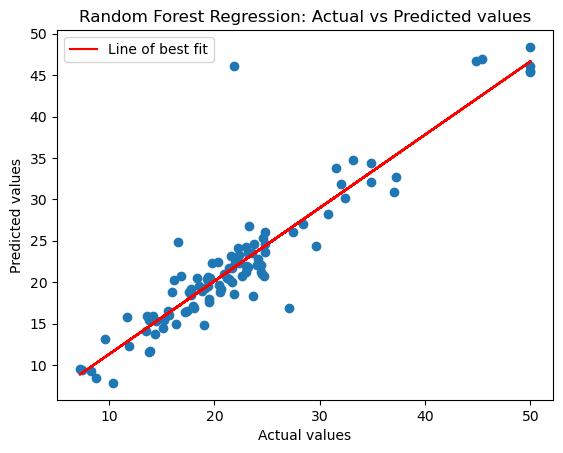

In [15]:
df_RF = df.copy()
#We already split the dataset earlier so to ensure a fair comparison between both approaches we will maintain the same 
#training and testing sets
#Training the random forest regressor and making prediction 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#Evaluating the model 
mserf = mean_squared_error(y_test, y_pred)
r2rf = r2_score(y_test, y_pred)
print(f"Random Forest Regression:")
print(f"Mean Squared Error: {mserf:.2f}")
print(f"R^2 Score: {r2rf:.2f}")
#Visualizing the performance of the model 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression: Actual vs Predicted values')
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
line = slope * y_test + intercept
plt.plot(y_test, line, color='red', label='Line of best fit')

plt.legend()
plt.show()

In [16]:
table = PrettyTable()
table.field_names = ["Model", "MSE", "R²"]

table.add_row(["Random Forest Regression", 12.25, 0.85])
table.add_row(["Linear Regression", 20.56, 0.75])

print("Comparison of models\n")
print(table)

Comparison of models

+--------------------------+-------+------+
|          Model           |  MSE  |  R²  |
+--------------------------+-------+------+
| Random Forest Regression | 12.25 | 0.85 |
|    Linear Regression     | 20.56 | 0.75 |
+--------------------------+-------+------+


# Conclusion : 
A final comparison of the error scores and R² of both models shows that the random forest regression is more accurate in analyzing this dataset and predicting the house prices.

work done by : hamdi neffati BA.Ibe